# Interactive Visualization of Decision Trees with Jupyter Widgets
https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

This covers the dynamic visualization of decision tree classifiers. The ones used use a sequence of if/else rules on training data in order to predict a target value.

Sklearn export_graphviz function used to display tree; sklearn wine data set will be used.

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

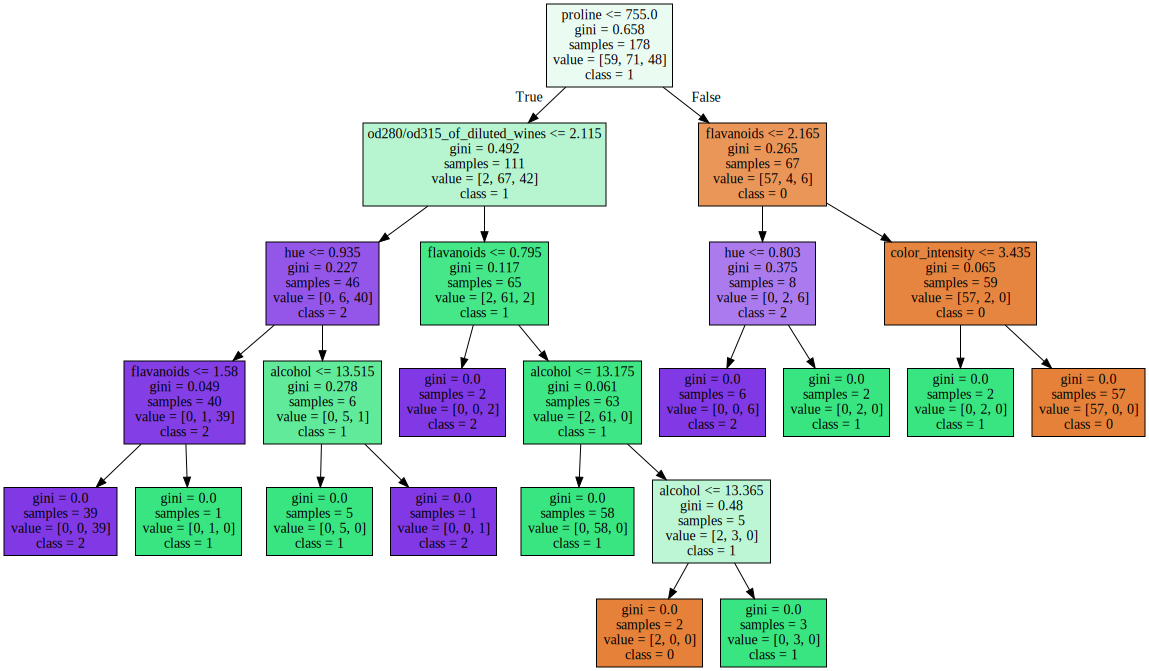

In [3]:
# load dataset
data = load_wine()

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

# print dataset description
print(data.DESCR)
estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

Gini refers to the Gini impurity, measure of how homogenous the samples are within a node. Node is pure when all its samples belong to the same class; no longer a need to split further.

Samples: number of instances in the node
Value array: shows distribution of these instances 
Each node above is colored according to the majority class.

Decision trees tend to over-fit data; means model will not generalize well to test/real data. To address this, use pre and post pruning.
Pre-pruning: restrict depth of a tree prior to creation
Post_pruning: removing non-informative nodes after the tree is built

Sklearn decision tree classifier implements only pre-pruning; can be controlled through max depth, min samples required for a node, and min instances required for a leaf.

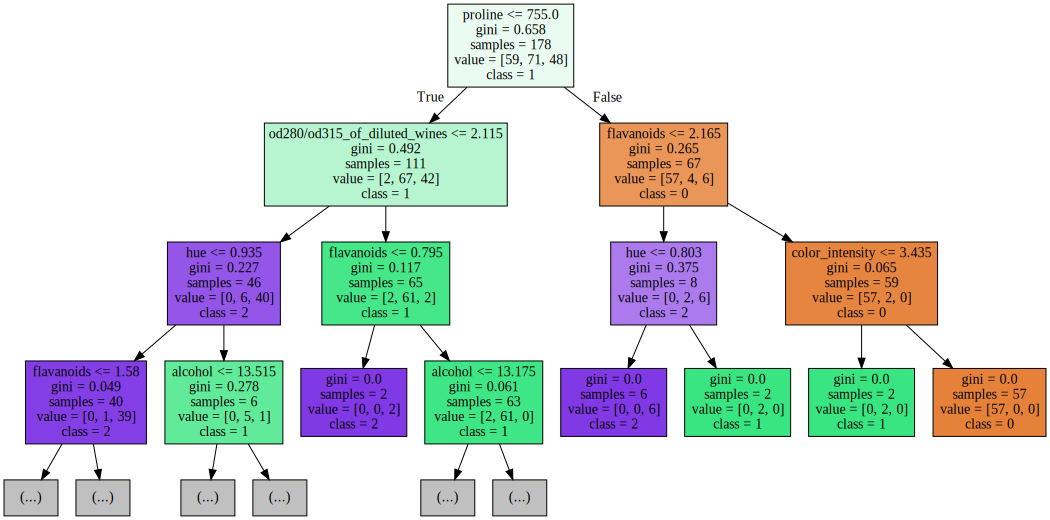

In [8]:
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True,max_depth = 3))
display(SVG(graph.pipe(format='svg')))

Above model is less deep and complex than the one we trained. Other parameters need to be optimizedl; can use Jupyter Widgets to build an interactive plot of our tree.

Jupyter widgets are interactive elements that allow us to render controls inside the notebook

Use interactive function by first defining function that trains and plots a decision tree. Use a Widget instance to show with display. 

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

# load dataset
data = load_wine()

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0 \
      , criterion = crit \
      , splitter = split \
      , max_depth = depth \
      , min_samples_split=min_split \
      , min_samples_leaf=min_leaf)
    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator\
      , out_file=None\
      , feature_names=labels\
      , class_names=['0', '1', '2']\
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    
    return estimator

inter=interactive(plot_tree \
   , crit = ["gini", "entropy"]\
   , split = ["best", "random"]\
   , depth=[1,2,3,4]\
   , min_split=(0.1,1)\
   , min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…